# This notebook gives an example of how to use Diagram Generator as a stand-alone tool, and shows how to visualize the diagrams that are generated.  The algorithm is detailed in the manuscript available at arXiv:2008.05081

## Note: in order to visualize Feynman Diagrams, we use the python package pyx, which relies upon $\LaTeX$. 

## A $\TeX$ distribution is NOT required to use the DiagramGenerator. In order to use this notebook, which focuses on visualization, you must have a $\TeX$ distribution installed.  

## To use this notebook with Google Colab, you must un-comment and run the following cell

In [ ]:
#!apt-get install texlive-fonts-recommended
#!apt-get install dvipng

# Setting up the notebook

In [1]:
%matplotlib notebook

In [2]:
# (optional) uncomment the following line if you would like to install ufss on your system
#!pip install ufss

In [3]:
import numpy as np
import ufss
import os

# Using the Diagram Generator

In [4]:
# DiagramGenerator class, or DG for short
DG = ufss.DiagramGenerator

This notebook begins with an example of using the Diagram Generator to generate diagrams for optical nonlinear spectroscopy using the 2D photon echo as an example.  We then move on to the fluorescence-detected analogue of 2D photon echo as a counter-point.  Following that are further examples.  A list of all examples included in this notebook follows, in order of appearance:
1. Tranditional 2D photon echo (2DPE)
2. Fluorescence-detected 2DPE (or any action detection method)
3. Transient Absoroption (TA)
4. 5th-order correction to TA in the pump amplitude
5. 5th-order correction to TA in the probe amplitude
6. Exciton-exciton interaction 2D spectroscopy
7. 2DPE for IR vibrational spectroscopy

# 1. 2DPE

## Generic case

In [5]:
# initialize the module
tdpe = DG() # DG takes a single key-word argument, which has the default value detection_type = 'polarization'

DiagramAutomation needs to know the phase-matching/-cycling condition and pulse intervals where pulses
are non-zero.  See Sec. III of arXiv:2008.05081 (in particular Figure 2)

In [6]:
# 2DPE example of phase-matching
tdpe.set_phase_discrimination([(0,1),(1,0),(1,0)])

# Set the pulse durations for pulses 0,1,2 and the local oscillator
d0 = 2
d1 = 4
d2 = 4
dlo = 6

# Set the pulse intervals
t0 = np.array([-d0/2,d0/2])
t1 = np.array([-d1/2,d1/2])
t2 = np.array([-d2/2,d2/2])
tlo = np.array([-dlo/2,dlo/2])
all_pulse_intervals = [t0,t1,t2,tlo]

# These pulse intervals are given to DG by setting DG's efield_times attribute
tdpe.efield_times = all_pulse_intervals

In [10]:
# using a list of pulse arrival times, we can generate the diagrams that contribute for 
# that set of arrival times, by passing the arrival times to the method 'get_diagrams'
# we choose arrival times that ensure that none of the pulses overlap:
arrival_times = [0,100,200,200] 
# note the arrival time of the local oscillator is irrelevant, but needed by the code at this time
# here we choose for the local oscillator to "arrive" simulltaneously with the 3rd pulse
time_ordered_diagrams = tdpe.get_diagrams(arrival_times)
time_ordered_diagrams

[(('Bu', 0), ('Ku', 1), ('Ku', 2)),
 (('Bu', 0), ('Ku', 1), ('Bd', 2)),
 (('Bu', 0), ('Bd', 1), ('Ku', 2))]

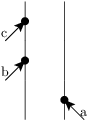

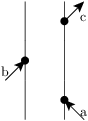

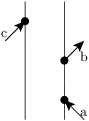

In [11]:
#display the diagrams for visual inspection (takes a few seconds to render)
tdpe.display_diagrams(time_ordered_diagrams)

In [12]:
# an example of arrival times where all three pulses overlap, given the pulse durations d0, d1 and d2
arrival_times = [0,1,2,2] # gives the same answer as arrival_times = [0,0,0,0]
all_diagrams = tdpe.get_diagrams(arrival_times)
print('There are ',len(all_diagrams),' diagrams in total')

There are  16  diagrams in total


In [13]:
# Check in this folder after running this cell to see 16 individual diagrams saved as pdf files
tdpe_diagrams_folder = 'TDPE_all_diagrams'
os.makedirs(tdpe_diagrams_folder,exist_ok=True)

# rendering and saving the diagrams takes a few seconds
tdpe.save_diagrams(all_diagrams,folder_name=tdpe_diagrams_folder)

To play with different cases where only some of the pulses overlap, uncomment and execute any of the following:

In [14]:
# In each of the following cases we have supplied a list of arrival times that cause only certain pulses to overlap

#ab_overlap = tdpe.get_diagrams([0,1,6,6])
#bc_overlap = tdpe.get_diagrams([0,4,6,6])
#ab_bc_overlap = tdpe.get_diagrams([0,2,5,5])

9


And uncomment the following for the case you want to see

In [12]:
#tdpe.display_diagrams(ab_overlap) #<--- change the argument of display diagrams to the case you have uncommented and executed

## Time-ordered example for only one electronic excited state

If the system under study has only one excited electronic state, then the excited-state absoroption process cannot take place.  This is captured by setting the attribute 'maximum_manifold' (default value $\infty$) as follows (see Sec. III, item (4)(a) on pages 4-5 of arXiv:2008.05081 for a discussion about maximum and minimum manifold values)

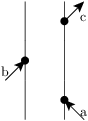

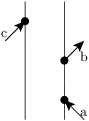

In [13]:
tdpe.maximum_manifold = 1
time_ordered_diagrams = tdpe.get_diagrams([0,100,200,200])
tdpe.display_diagrams(time_ordered_diagrams)

Note that even for the case of a single electronic excitation, if there is a significant electronic relaxation rate, 'maximum_manifold' should not be set to 1, but left at the default value $\infty$

# 2. Action-detected 2DPE

In [14]:
tdfs = DG(detection_type='fluorescence')

tdfs.set_phase_discrimination([(0,1),(1,0),(1,0),(0,1)])

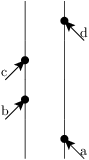

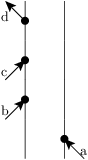

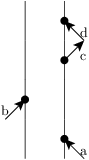

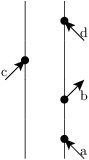

In [15]:
# set the pulse duration and interval of the 4th pulse (re-using pulse intervals for pulses 0-2)
d3 = 5
t3 = np.array([-d3/2,d3/2])
all_pulse_intervals = [t0,t1,t2,t3]
# pass pulse intervals to tdfs instance of DG
tdfs.efield_times = all_pulse_intervals
time_ordered_diagrams = tdfs.get_diagrams([0,100,200,300])
tdfs.display_diagrams(time_ordered_diagrams)

In [16]:
# and all possibly relevant diagrams can be generated by setting the pulse delays so that all pulses overlap
all_diagrams = tdfs.get_diagrams([0,1,2,2])
print('There are ',len(all_diagrams),' diagrams in total')

There are  88  diagrams in total


In [ ]:
# Check in this folder to see 16 individual diagrams
tdfs_diagrams_folder = 'TDFS_all_diagrams'
os.makedirs(tdfs_diagrams_folder,exist_ok=True)
tdfs.save_diagrams(all_diagrams,folder_name=tdfs_diagrams_folder)

To play with different cases where only some of the pulses overlap, uncomment and execute any of the following:

In [41]:
#ab_overlap = tdfs.get_diagrams([0,1,6,12])
#bc_overlap = tdfs.get_diagrams([0,5,5,12])
#cd_overlap = tdfs.get_diagrams([0,5,10,12])
#ab_bc_overlap = tdfs.get_diagrams([0,3,6,12])
#ab_cd_overlap = tdfs.get_diagrams([0,1,10,12])
# and so on

16

And uncomment the following for the case you want to see

In [ ]:
#tdfs.display_diagrams(ab_overlap) #<--- change the argument of display diagrams to the case you have uncommented and executed

# TA

In [40]:
ta = DG()
ta.set_phase_discrimination([(1,1),(1,0)])
pump_interval = t0
probe_interval = t1
ta.efield_times = [t0,t1]

# TA 5th-order corrections

## Higher order in pump amplitude

In [42]:
ta5order_pump = DG()
ta5order_pump.set_phase_discrimination([(2,2),(1,0)])
ta5order_pump.efield_times = [t0,t1]
# Time-ordered diagrams
ta5order_pump.get_diagrams([0,100,100])

[(('Ku', 0), ('Ku', 0), ('Bu', 0), ('Bu', 0), ('Ku', 1)),
 (('Ku', 0), ('Ku', 0), ('Bu', 0), ('Bu', 0), ('Bd', 1)),
 (('Ku', 0), ('Ku', 0), ('Bu', 0), ('Kd', 0), ('Ku', 1)),
 (('Ku', 0), ('Ku', 0), ('Bu', 0), ('Kd', 0), ('Bd', 1)),
 (('Ku', 0), ('Ku', 0), ('Kd', 0), ('Bu', 0), ('Ku', 1)),
 (('Ku', 0), ('Ku', 0), ('Kd', 0), ('Bu', 0), ('Bd', 1)),
 (('Ku', 0), ('Ku', 0), ('Kd', 0), ('Kd', 0), ('Ku', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 0), ('Bu', 0), ('Ku', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 0), ('Bu', 0), ('Bd', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 0), ('Kd', 0), ('Ku', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 0), ('Kd', 0), ('Bd', 1)),
 (('Bu', 0), ('Ku', 0), ('Bd', 0), ('Bu', 0), ('Ku', 1)),
 (('Bu', 0), ('Ku', 0), ('Bd', 0), ('Bu', 0), ('Bd', 1)),
 (('Bu', 0), ('Ku', 0), ('Bd', 0), ('Kd', 0), ('Ku', 1)),
 (('Bu', 0), ('Bd', 0), ('Ku', 0), ('Bu', 0), ('Ku', 1)),
 (('Bu', 0), ('Bd', 0), ('Ku', 0), ('Bu', 0), ('Bd', 1)),
 (('Bu', 0), ('Bd', 0), ('Ku', 0), ('Kd', 0), ('Ku', 1)),
 (('Bu', 0), (

## Higher order in probe amplitude

In [43]:
ta5order_probe = DG()
ta5order_probe.set_phase_discrimination([(1,1),(2,1)])
ta5order_probe.efield_times = [t0,t1]
ta5order_probe.get_diagrams([0,100,100])

[(('Bu', 0), ('Ku', 0), ('Ku', 1), ('Ku', 1), ('Bu', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 1), ('Ku', 1), ('Kd', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 1), ('Bd', 1), ('Bu', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 1), ('Bd', 1), ('Kd', 1)),
 (('Bu', 0), ('Ku', 0), ('Bd', 1), ('Ku', 1), ('Bu', 1)),
 (('Bu', 0), ('Ku', 0), ('Bd', 1), ('Ku', 1), ('Kd', 1)),
 (('Bu', 0), ('Bd', 0), ('Ku', 1), ('Ku', 1), ('Bu', 1)),
 (('Bu', 0), ('Bd', 0), ('Ku', 1), ('Ku', 1), ('Kd', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Bu', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Kd', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Bu', 1)),
 (('Ku', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Kd', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Bu', 1)),
 (('Ku', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Kd', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 1), ('Ku', 1), ('Bu', 1)),
 (('Ku', 0), ('Kd', 0), ('Ku', 1), ('Ku', 1), ('Kd', 1)),
 (('Bu', 0), ('Ku', 0), ('Ku', 1), ('Bu', 1), ('Ku', 1)),
 (('Bu', 0), (

# EEI2D

In [44]:
eei2d = DG()
eei2d.set_phase_discrimination([(0,2),(2,0),(1,0)])
eei2d.efield_times = [t0,t1,t2,tlo]
eei2d.get_diagrams([0,100,200,300])

[(('Bu', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Ku', 2)),
 (('Bu', 0), ('Bu', 0), ('Ku', 1), ('Ku', 1), ('Bd', 2)),
 (('Bu', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Ku', 2)),
 (('Bu', 0), ('Bu', 0), ('Ku', 1), ('Bd', 1), ('Bd', 2)),
 (('Bu', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Ku', 2)),
 (('Bu', 0), ('Bu', 0), ('Bd', 1), ('Ku', 1), ('Bd', 2)),
 (('Bu', 0), ('Bu', 0), ('Bd', 1), ('Bd', 1), ('Ku', 2))]

# 2DPE for IR vibrational spectroscopy

For IR vibrational spectroscopy, the 'maximum_manifold' should be set to the default of $\infty$.  In addition, the 'minimum_manifold' should be set to a negative number.  This is because, outside of zero temperature limit, the initial state of the system is a Boltzmann distribution of vibrational occupational states.  The $n=1$ vibrational state can be de-excited once, the $n=2$ vibrational state can be de-excited twice, and so on.  Depending on the ratio of $k_BT/\hbar\omega$, where $\omega$ is the vibrational frequency, the initial distribution will contain appreciable weight in the first $n$ vibrational ladder states.  This information should be used in setting 'minimum_manifold' (see Sec. III, item (4)(a) on pages 4-5 of arXiv:2008.05081 for a discussion about maximum and minimum manifold values).  Here are two examples

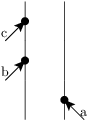

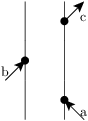

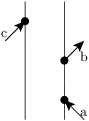

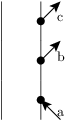

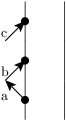

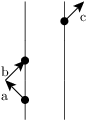

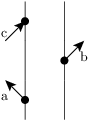

In [38]:
tdpe.maximum_manifold = np.inf
tdpe.minimum_manifold = -1
tdpe.display_diagrams(tdpe.get_diagrams([0,100,200,200]))

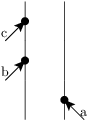

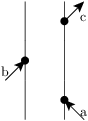

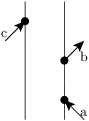

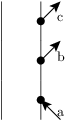

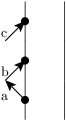

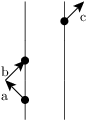

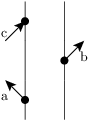

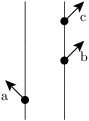

In [39]:
# or 
tdpe.maximum_manifold = np.inf
tdpe.minimum_manifold = -2
tdpe.display_diagrams(tdpe.get_diagrams([0,100,200,200]))

Going below minimum_manifold=-2 has no further effect on 2DPE, but one would need to consider smaller minimum_manifold values for higher-order spectroscopies.  To be safe, one can simply set minimum_manifold=-np.inf, though this may lead to unnecessary calculations, depending upon the initial thermal distribution of vibrational eigenstates